# Experiment 1
## Implementation of a single artificial neuron.
#### Write a program to simulate a single artificial neuron performing binary classification.


In [18]:
import numpy as np

class SingleNeuron:
    def __init__(self, learning_rate=0.1, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weight = None
        self.bias = None

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weight = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                # Compute linear output
                linear_output = np.dot(x_i, self.weight) + self.bias
                # Apply activation function
                y_predicted = self._sigmoid(linear_output)
                # Compute gradient and update weights and bias
                error = y[idx] - y_predicted
                self.weight += self.learning_rate * error * x_i
                self.bias += self.learning_rate * error

    def predict(self, X):
        linear_output = np.dot(X, self.weight) + self.bias
        y_predicted = self._sigmoid(linear_output)
        return [1 if i >= 0.5 else 0 for i in y_predicted]

if __name__ == "__main__":
    # Define a simple binary classification dataset (OR gate)
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
    y = np.array([0, 1, 1, 1])  # OR gate output

    # Initialize and train the single artificial neuron
    neuron = SingleNeuron(learning_rate=0.1, epochs=1000)
    neuron.fit(X, y)

    # Test the neuron on the dataset
    predictions = neuron.predict(X)

    print("Predictions:", predictions)
    print("Actual:", y)

Predictions: [0, 1, 1, 1]
Actual: [0 1 1 1]


# Experiment 2
## Implementation of Single Layer Perceptron (SLP).
#### Train and test SLP on a linearly separable dataset (e.g., AND/OR gate).


In [7]:
#Implementation of a perceptron for AND gate

import numpy as np

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Convert labels to 1 and -1
        y = np.where(y <= 0, -1, 1)

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)

                if y[idx] * y_predicted <= 0:
                    self.weights += self.learning_rate * y[idx] * x_i
                    self.bias += self.learning_rate * y[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)

if __name__ == "__main__":
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
    y = np.array([0, 0, 0, 1])  # AND gate output

    # Initialize and train perceptron
    perceptron = Perceptron(learning_rate=0.1, epochs=10)
    perceptron.fit(X, y)

    # Test perceptron
    predictions = perceptron.predict(X)
    print("Predictions:", predictions)

Predictions: [-1. -1. -1.  1.]


# Experiment 3
## Multi-Layer Perceptron (MLP) for XOR Gate.
#### Design and train MLP to solve the XOR problem.


In [10]:
import numpy as np

# Define the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Define activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

# Define the MLP class
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.random.randn(hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.random.randn(output_size)

    def forward(self, inputs):
        # Hidden layer
        self.hidden_input = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)

        # Output layer
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_input)
        return self.output

    def backward(self, inputs, targets, learning_rate):
        # Calculate error
        output_error = targets - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += np.outer(self.hidden_output, output_delta) * learning_rate
        self.bias_output += output_delta * learning_rate
        self.weights_input_hidden += np.outer(inputs, hidden_delta) * learning_rate
        self.bias_hidden += hidden_delta * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            for i in range(X.shape[0]):
                self.forward(X[i])
                self.backward(X[i], y[i], learning_rate)

    def predict(self, X):
        predictions = []
        for i in range(X.shape[0]):
            output = self.forward(X[i])
            predictions.append(1 if output >= 0.5 else 0)
        return predictions

if __name__ == "__main__":
    # Initialize and train the MLP
    input_size = 2
    hidden_size = 2
    output_size = 1
    mlp = MLP(input_size, hidden_size, output_size)

    # Train the MLP
    mlp.train(X, y, epochs=10000, learning_rate=0.1)

    # Test the MLP
    predictions = mlp.predict(X)
    print("Predictions:", predictions)

Predictions: [0, 1, 1, 0]


# Experiment 4
## Activation Functions.
#### Implement Sigmoid, ReLU, and Tanh activation functions.


In [12]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000, activation="step"):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.activation = activation

    def _activation_function(self, x):
        if self.activation == "step":
            return np.sign(x)
        elif self.activation == "sigmoid":
            return 1 / (1 + np.exp(-x))
        elif self.activation == "relu":
            return np.maximum(0, x)
        elif self.activation == "tanh":
            return np.tanh(x)
        else:
            raise ValueError("Unsupported activation function")

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y = np.where(y <= 0, -1, 1)  # Convert targets to -1 and 1

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._activation_function(linear_output)
                if y[idx] * np.sign(y_predicted) <= 0:  # Only adjust for misclassifications
                    self.weights += self.learning_rate * y[idx] * x_i
                    self.bias += self.learning_rate * y[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._activation_function(linear_output)
        if self.activation == "step":
            return np.sign(y_predicted)
        elif self.activation in ["sigmoid", "tanh"]:
            return np.where(y_predicted >= 0, 1, -1)  # Binary decision for sigmoid/tanh
        else:
            return np.where(y_predicted > 0, 1, 0)  # For ReLU


if __name__ == "__main__":
    data = load_breast_cancer()
    X = data.data
    y = data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Step activation
    perceptron_step = Perceptron(learning_rate=0.01, epochs=1000, activation="step")
    perceptron_step.fit(X_train, y_train)
    predictions_step = perceptron_step.predict(X_test)
    predictions_step = np.where(predictions_step <= 0, 0, 1)
    accuracy_step = np.mean(predictions_step == y_test)
    print("Step Activation Accuracy:", accuracy_step)

    # Sigmoid activation
    perceptron_sigmoid = Perceptron(learning_rate=0.01, epochs=1000, activation="sigmoid")
    perceptron_sigmoid.fit(X_train, y_train)
    predictions_sigmoid = perceptron_sigmoid.predict(X_test)
    predictions_sigmoid = np.where(predictions_sigmoid <= 0, 0, 1)
    accuracy_sigmoid = np.mean(predictions_sigmoid == y_test)
    print("Sigmoid Activation Accuracy:", accuracy_sigmoid)

    # ReLU activation
    perceptron_relu = Perceptron(learning_rate=0.01, epochs=1000, activation="relu")
    perceptron_relu.fit(X_train, y_train)
    predictions_relu = perceptron_relu.predict(X_test)
    predictions_relu = np.where(predictions_relu <= 0, 0, 1)
    accuracy_relu = np.mean(predictions_relu == y_test)
    print("ReLU Activation Accuracy:", accuracy_relu)

    # Tanh activation
    perceptron_tanh = Perceptron(learning_rate=0.01, epochs=1000, activation="tanh")
    perceptron_tanh.fit(X_train, y_train)
    predictions_tanh = perceptron_tanh.predict(X_test)
    predictions_tanh = np.where(predictions_tanh <= 0, 0, 1)
    accuracy_tanh = np.mean(predictions_tanh == y_test)
    print("Tanh Activation Accuracy:", accuracy_tanh)

Step Activation Accuracy: 0.9298245614035088


<ipython-input-12-b49af512d0f0>:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Sigmoid Activation Accuracy: 0.6228070175438597
ReLU Activation Accuracy: 0.9736842105263158
Tanh Activation Accuracy: 0.9298245614035088


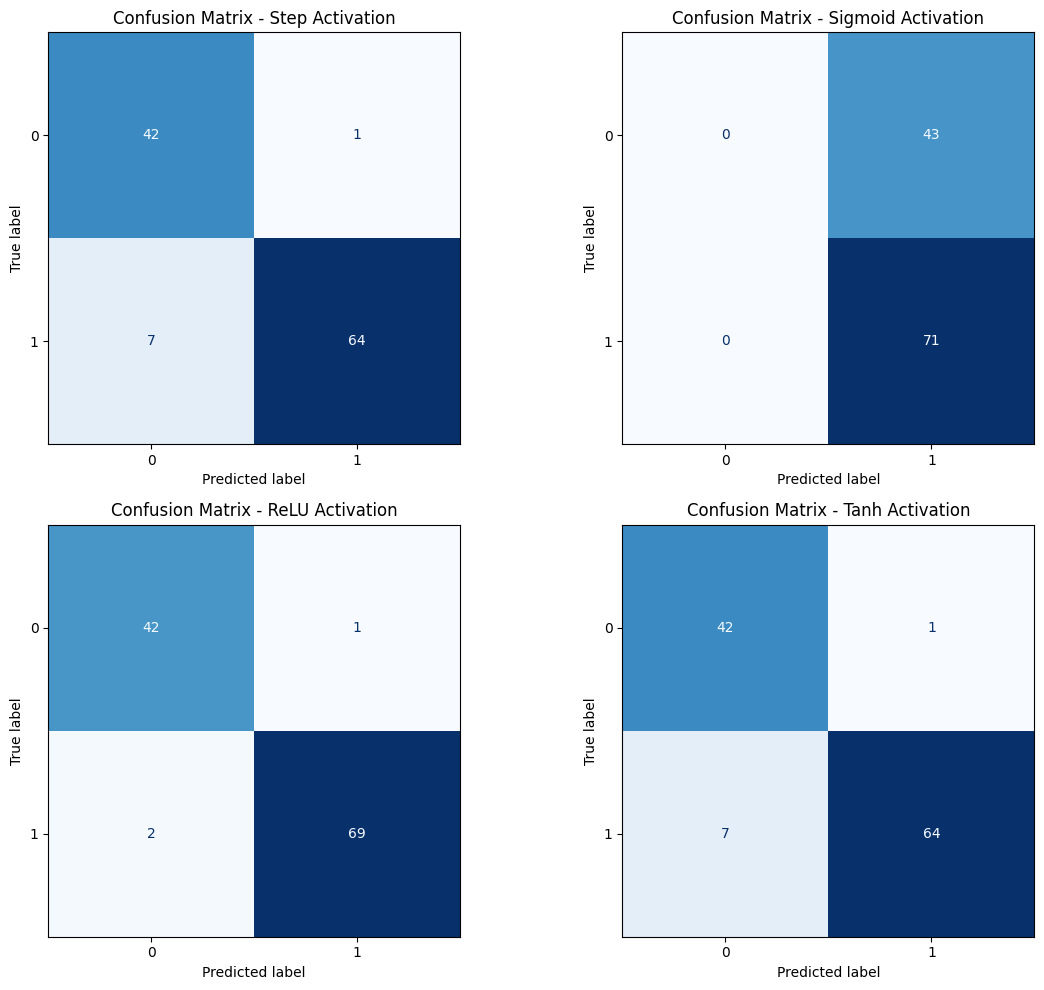

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Function to visualize confusion matrices
def plot_confusion_matrices(predictions, y_test):
    plt.figure(figsize=(12, 10))
    activations = list(predictions.keys())

    for i, activation in enumerate(activations, 1):
        cm = confusion_matrix(y_test, predictions[activation])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
        plt.subplot(2, 2, i)
        disp.plot(cmap="Blues", ax=plt.gca(), colorbar=False)
        plt.title(f"Confusion Matrix - {activation} Activation")
        plt.grid(False)

    plt.tight_layout()
    plt.show()

# Call the function with predictions
plot_confusion_matrices(predictions, y_test)


# Experiment 5
## Forward and Backpropagation.
#### Implement forward propagation and backpropagation manually for a 2-layer neural network.


In [16]:
import numpy as np

# Define activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

# Define a simple 2-layer neural network
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        # Initialize weights and biases randomly
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))
        self.learning_rate = learning_rate

    def forward_propagation(self, X):
        # Input to hidden layer
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)

        # Hidden to output layer
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_input)

        return self.output

    def backward_propagation(self, X, y):
        # Error at output layer
        output_error = self.output - y
        output_delta = output_error * sigmoid_derivative(self.output)

        # Error at hidden layer
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output -= self.learning_rate * np.dot(self.hidden_output.T, output_delta)
        self.bias_output -= self.learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        self.weights_input_hidden -= self.learning_rate * np.dot(X.T, hidden_delta)
        self.bias_hidden -= self.learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            # Forward pass
            self.forward_propagation(X)
            # Backward pass
            self.backward_propagation(X, y)

    def predict(self, X):
        predictions = self.forward_propagation(X)
        return (predictions > 0.5).astype(int)

# Example usage
if __name__ == "__main__":
    # XOR dataset
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    # Initialize and train the neural network
    nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1, learning_rate=0.1)
    nn.train(X, y, epochs=10000)

    # Test the neural network
    predictions = nn.predict(X)
    print("Predictions:\n", predictions)


Predictions:
 [[0]
 [1]
 [1]
 [0]]
